# PIT dataset analysis

Load dataset (requires python 2.7)

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

fibdataset = open('/home/suyash/Documents/GitHub/ndn-pit/datasets/Average_workload.lineLenRndOpp.fib')

In [3]:
# Prints size of the database used
entries = str(sum(1 for _ in fibdataset))
fibdataset.seek(0)
print "Number entries used for analysis: " + entries

Number entries used for analysis: 3149274


Method for processing each entry to generate usefull data

In [4]:
def get_levels_count(entry):
    return entry.count('/')

In [5]:
def get_character_count(entry):
    return len(entry)

Process the dataset

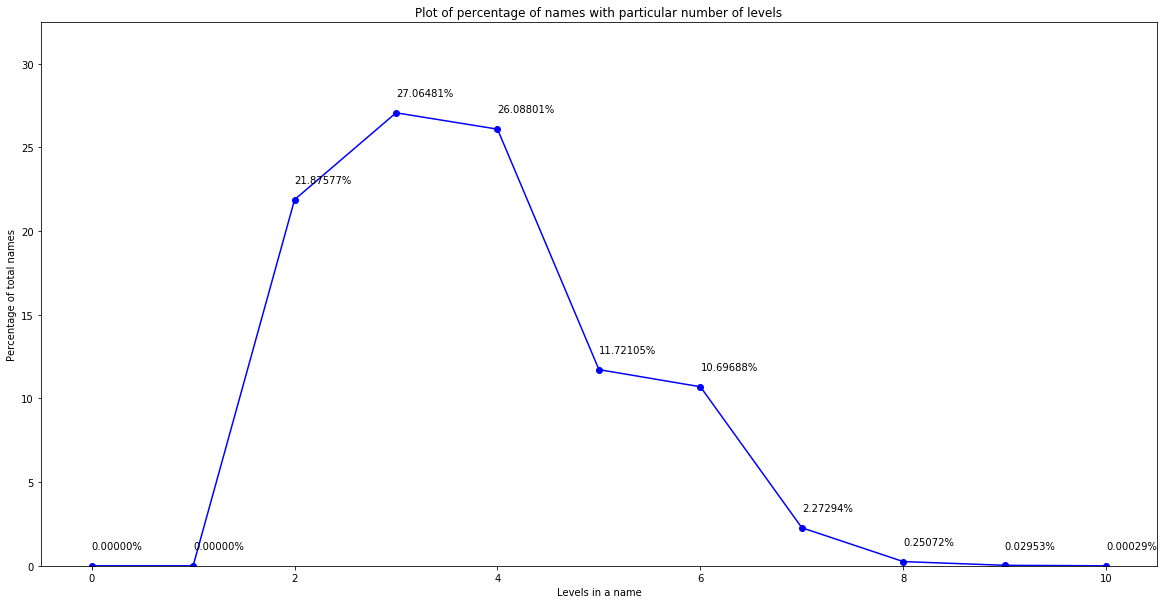

In [6]:
levelCountList = [] # Stores level count of each entry   
highestLevel = 0 # Counts highest level that appears in dataset
count = 0
for line in fibdataset:
    levels = get_levels_count(line)
    levelCountList.append(levels)
    
    if (levels > highestLevel):
        highestLevel = levels
        
    count += 1
fibdataset.seek(0) # Resets cur pos to starting of file

levelCountList2 = [0]*highestLevel

for level in levelCountList:
    levelCountList2[level-1] += 1
    
for i in range(highestLevel):
    levelCountList2[i] /= count/100

    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_ylim(0, max(levelCountList2) * 1.2)

plt.plot(levelCountList2, 'b-o')

x = []
for i in range(highestLevel):
    x.append(i)
    
for i,j in zip(x, levelCountList2):
    ax.annotate(str(str('%.5f'%j) + '%'),xy=(i,j+1))
plt.title('Plot of percentage of names with particular number of levels')

plt.xlabel('Levels in a name')
plt.ylabel('Percentage of total names')

plt.show()

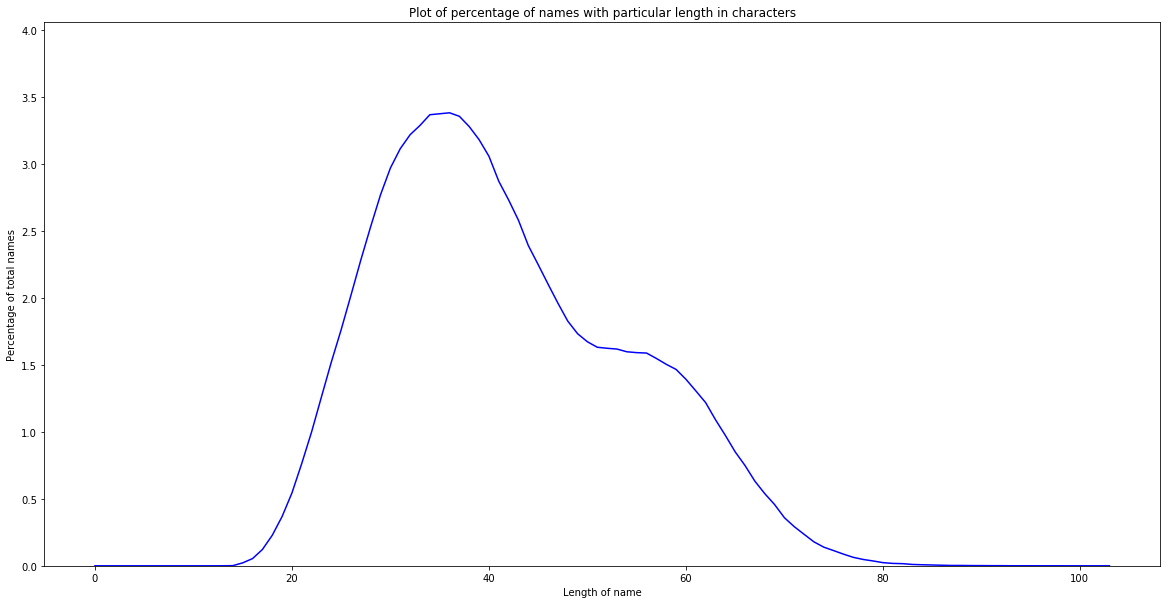

In [7]:
levelCountList = [] # Stores level count of each entry   
highestLevel = 0 # Counts highest level that appears in dataset
count = 0
for line in fibdataset:
    levels = get_character_count(line)
    levelCountList.append(levels)
    
    if (levels > highestLevel):
        highestLevel = levels
        
    count += 1
fibdataset.seek(0) # Resets cur pos to starting of file

levelCountList2 = [0]*highestLevel

for level in levelCountList:
    levelCountList2[level-1] += 1
    
for i in range(highestLevel):
    levelCountList2[i] /= count/100

     #300 represents number of points to make between T.min and T.max

x = []
for i in range(highestLevel):
    x.append(i)      

T = np.array(x)
power = np.array(levelCountList2)

xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max
power_smooth = spline(T,power,xnew)

    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_ylim(0, max(levelCountList2) * 1.2)

plt.plot(levelCountList2, 'b-')


    
# for i,j in zip(x, levelCountList2):
#     ax.annotate(str('%.3f'%j),xy=(i,j+0.5))
plt.title('Plot of percentage of names with particular length in characters')

plt.xlabel('Length of name')
plt.ylabel('Percentage of total names')

plt.show()

In [8]:
def find_occurences(s, ch):
    """ Find all occurences of a character in a string """
    return [i for i, letter in enumerate(s) if letter == ch]

In [9]:
def get_component_at_level(name, level):
    """ Returns component from a NDN name (O indexed) """
    separatorPosArr = find_occurences(name, '/')
    if (level+1 >= len(separatorPosArr)):
        return ""
    else: 
        endOfComponent = 0
        if (level>len(separatorPosArr)):
            endOfComponent = len(name)
        else:
            endOfComponent = separatorPosArr[level+1]
        return name[separatorPosArr[level]+1:endOfComponent]

In [12]:
get_component_at_level("/line/sample/text/on/a/url/", 0)

'line'

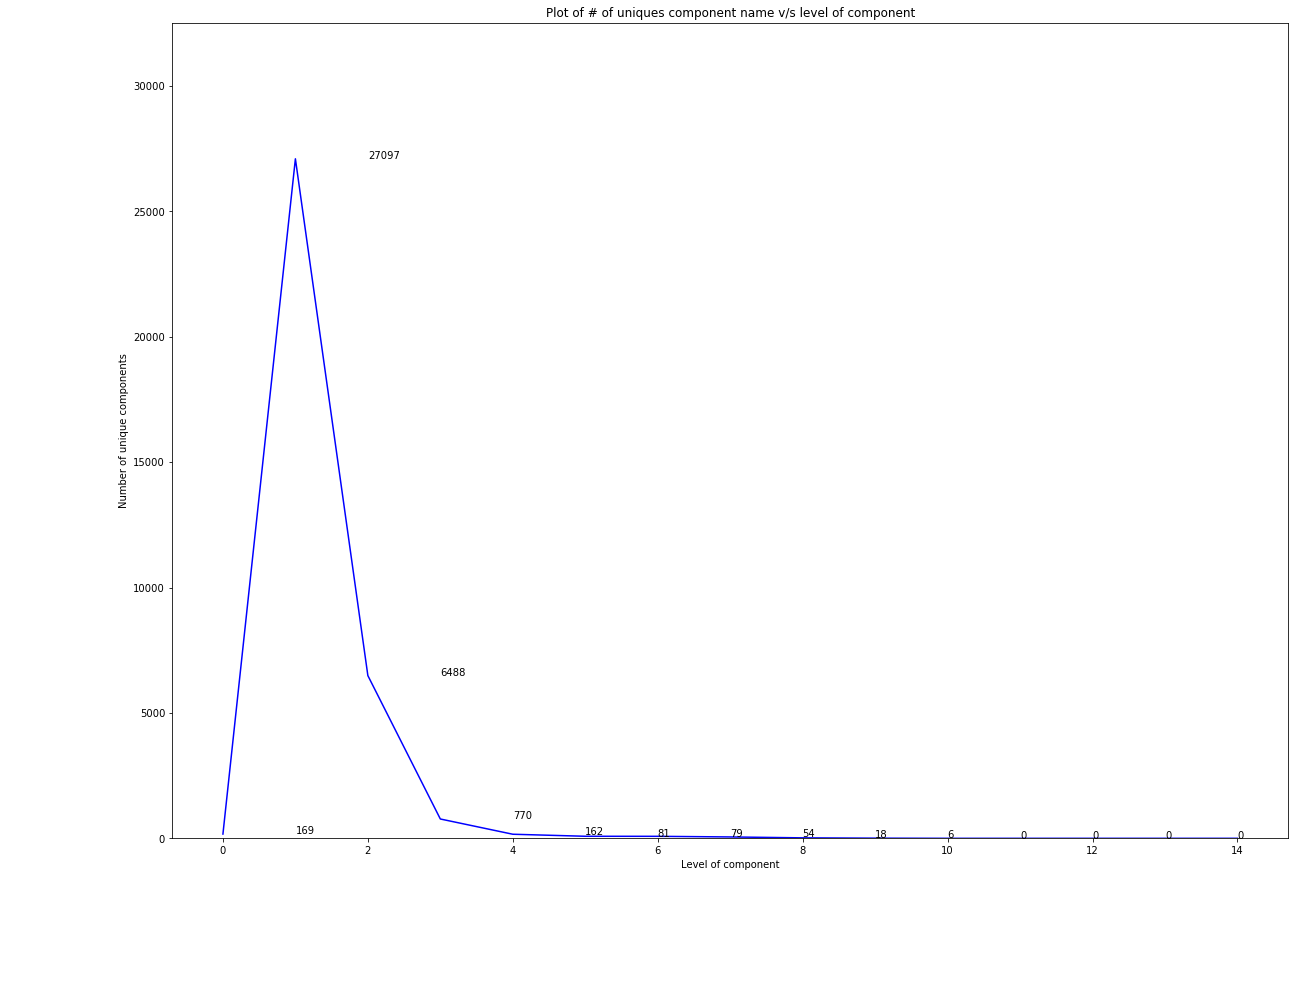

In [13]:
totalComponentsCount = 0 # Keeps count of total number of components processed
UniqueNameCount = []
count = 0
MAX_ANALYSIS_LEVEL = 15

for i in range (0, MAX_ANALYSIS_LEVEL):
    componentNameTable = {}
    for line in fibdataset:
        componentToAdd = get_component_at_level(line, i)
        if (componentToAdd != ""):
            if componentToAdd in componentNameTable:
                componentNameTable[componentToAdd] += 1
            else:
                componentNameTable[componentToAdd] = 0
            count += 1
    fibdataset.seek(0) # Resets cur pos to starting of file
    UniqueNameCount.append(len(componentNameTable))
   
x = []
for i in range(1, MAX_ANALYSIS_LEVEL+1):
    x.append(i) 
    
fig = plt.figure(figsize=(20,15));
ax = fig.add_subplot(111);
ax.set_ylim(0, max(UniqueNameCount) * 1.2)

plt.plot(UniqueNameCount, 'b-');

for i,j in zip(x, UniqueNameCount):
    ax.annotate(str(j),xy=(i,j+0.5))
plt.title('Plot of # of uniques component name v/s level of component')

plt.ylabel('Number of unique components')
plt.xlabel('Level of component')

plt.show()

Final analysis of the datset

In [ ]:
totalUniqueComponentCount = 0 # Counts total number of unique component level by level
for key in UniqueNameCount:
    totalUniqueComponentCount += key
print "Total number of unique components summed among levels: " + str(totalUniqueComponentCount) + " components"
    